In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [6]:
user_data = pd.read_csv("user_table (1).csv")
test_results = pd.read_csv("test_results (1).csv")

In [7]:
data = pd.merge(test_results, user_data, on="user_id")

In [8]:
data.dropna(inplace=True)


In [15]:
data['device'] = data['device'].astype('category').cat.codes
data['source'] = data['source'].astype('category').cat.codes
data['operative_system'] = data['operative_system'].astype('category').cat.codes
data['country'] = data['country'].astype('category').cat.codes

In [ ]:
def normalize_column(df, column_name):
    """
    Normalize a column in a dataframe.
    Explain why you are normalizing the column in the comments.
    We
    """
    return (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())

In [54]:
data['normalized_lat'] = normalize_column(data, 'lat')
data['normalized_long'] = normalize_column(data, 'long')
#show normalized long and lat
print(data['normalized_lat'])


0         0.559065
1         0.602218
2         0.522662
3         0.370540
4         0.488187
            ...   
275611    0.526278
275612    0.344021
275613    0.557859
275614    0.438766
275615    0.533751
Name: normalized_lat, Length: 275616, dtype: float64


In [31]:
conversion_rates = data.groupby('test')['converted'].mean()
print("Conversion Rates by Test Group:\n", conversion_rates)

Conversion Rates by Test Group:
 test
0    0.019776
1    0.015425
Name: converted, dtype: float64


C:\Users\John Liu\AppData\Local\Temp\ipykernel_7780\1979139799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette='Blues_d')


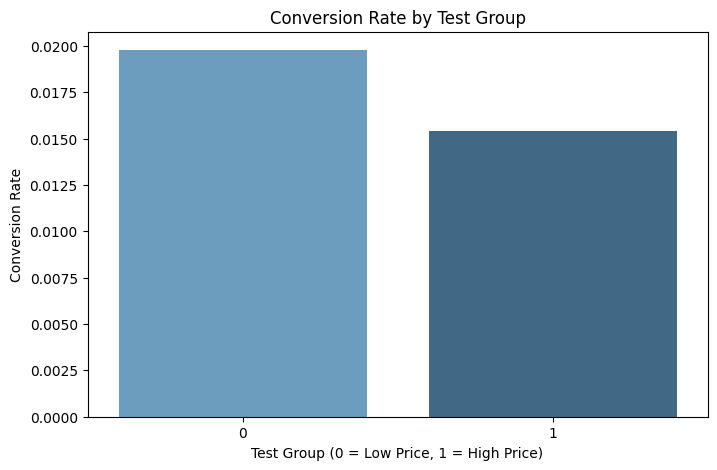

In [36]:
plt.figure(figsize=(8, 5))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette='Blues_d')
plt.title("Conversion Rate by Test Group")
plt.xlabel("Test Group (0 = Low Price, 1 = High Price)")
plt.ylabel("Conversion Rate")
plt.show()

In [ ]:
# Split the data into X and y
X = data[['source', 'device', 'operative_system', 'test', 'country', 'normalized_lat', 'normalized_long']]
y = data['converted']

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Squared Error: 0.0183
R2 Score: 0.0004


C:\Users\John Liu\AppData\Local\Temp\ipykernel_7780\3847985378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_test, y=y_pred, palette="Blues")


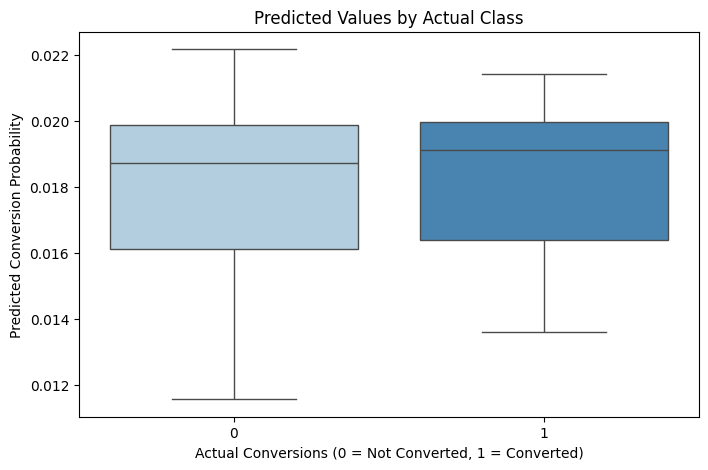

In [48]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=y_test, y=y_pred, palette="Blues")
plt.title("Predicted Values by Actual Class")
plt.xlabel("Actual Conversions (0 = Not Converted, 1 = Converted)")
plt.ylabel("Predicted Conversion Probability")
plt.show()

In [41]:
def simulate_conversion(price, model, X):
    """
    Simulate conversion rate for a given price using the linear regression model.
    """
    X_sim = X.copy()
    X_sim['price'] = price
    return model.predict(X_sim).mean()

In [42]:
price_range = np.linspace(data['price'].min(), data['price'].max(), 100)
simulated_conversions = [simulate_conversion(p, model, X_test) for p in price_range]

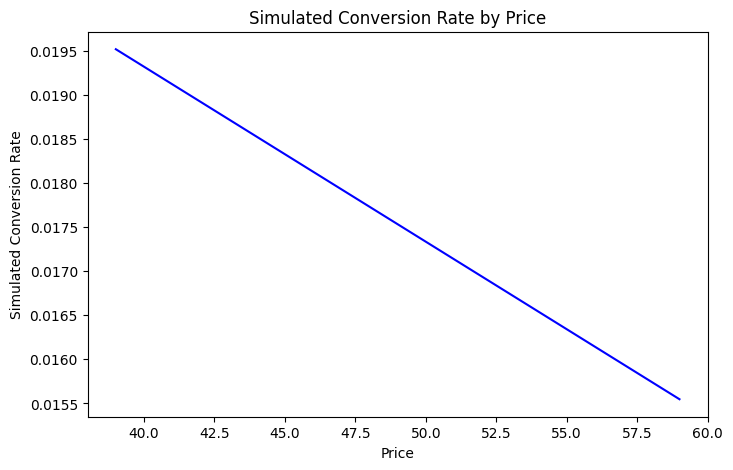

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(price_range, simulated_conversions, color='blue')
plt.title("Simulated Conversion Rate by Price")
plt.xlabel("Price")
plt.ylabel("Simulated Conversion Rate")
plt.show()

In [ ]:
optimal_price = price_range[np.argmax(simulated_conversions)]
results_summary = f"""
Conversion Rates:
Group A (Low Price): {conversion_rates[0]:.2f}
Group B (High Price): {conversion_rates[1]:.2f}

Model Evaluation:
Mean Squared Error: {mse:.4f}
R2 Score: {r2:.4f}
"""

print(results_summary)
print(f"Optimal Price: ${optimal_price:.2f}")


Conversion Rates:
Group A (Low Price): 0.02
Group B (High Price): 0.02

Model Evaluation:
Mean Squared Error: 0.0183
R2 Score: 0.0004

Optimal Price: $39.00


In [51]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [53]:
r2 = knn.score(X_test, y_test)
y_pred = knn.predict(X_test)

print(r2)
print(y_pred)

-0.1745683404042082
[0. 0. 0. ... 0. 0. 0.]
